In [1]:
import hdf5storage
import datetime
from datetime import date
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

/Users/apple/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import MSD

## Soh

In [12]:
#load data
mat1 = hdf5storage.loadmat('precip_1979.mat')
arrays1 = {}
for k, v in mat1.items():
    arrays1[k] = np.array(v)
p1=np.concatenate(list(arrays1.values()))
precip=p1
for n in range(1980,2018):
    #print('opening'+str(n))
    filename='precip_'+str(n)+'.mat'
    mat = hdf5storage.loadmat(filename)
    a = {}
    for k, v in mat.items():
        a[k] = np.array(v)
    p=np.concatenate(list(a.values()))
    precip=np.concatenate((precip,p),axis=2)

In [4]:
time=np.arange(date.toordinal(date(1979,1,1)),date.toordinal(date(2017,12,31))+1)
lat_full=np.ones((120,60))

In [8]:
expv=MSD.soh(precip,time,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:27: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,i]=np.nanmean(precip[:,:,index_here],axis=2)


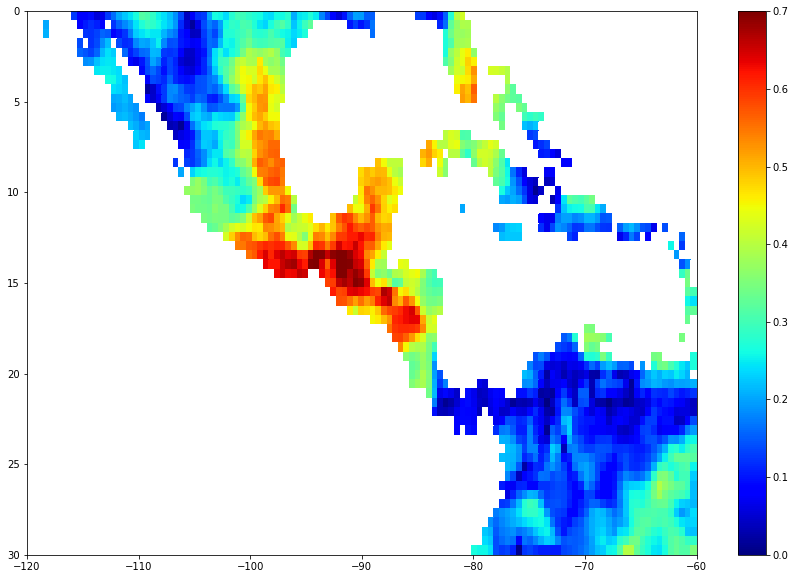

In [13]:
#plot results of soh
fig=plt.figure(figsize=(15,10))
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array ( expv, mask=np.isnan(expv)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='jet',vmin=0,vmax=0.7)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

## Detect_monthly

In [5]:
time=np.arange(date.toordinal(date(1979,1,1)),date.toordinal(date(2017,12,31))+1)
date_used=np.full([len(time),2],np.nan,dtype=int)
for ind,day in enumerate(time):
    date_used[ind,0]=date.fromordinal(day).year
    date_used[ind,1]=date.fromordinal(day).month
u_y_m=np.unique(date_used,axis=0)   

In [6]:
precip_month=np.full([precip.shape[0],precip.shape[1],u_y_m.shape[0]],np.nan)
for i,t in enumerate(u_y_m):
    index_here= np.logical_and(date_used[:,0]==t[0],date_used[:,1]==t[1])
    precip_month[:,:,i]=np.nanmean(precip[:,:,index_here],axis=2)

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [10]:
lat_full=np.ones((120,60))

In [7]:
depth,onset,ending=MSD.detect_monthly(precip_month,u_y_m,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:60: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,m]=np.nanmean(precip[:,:,index_here],axis=2)


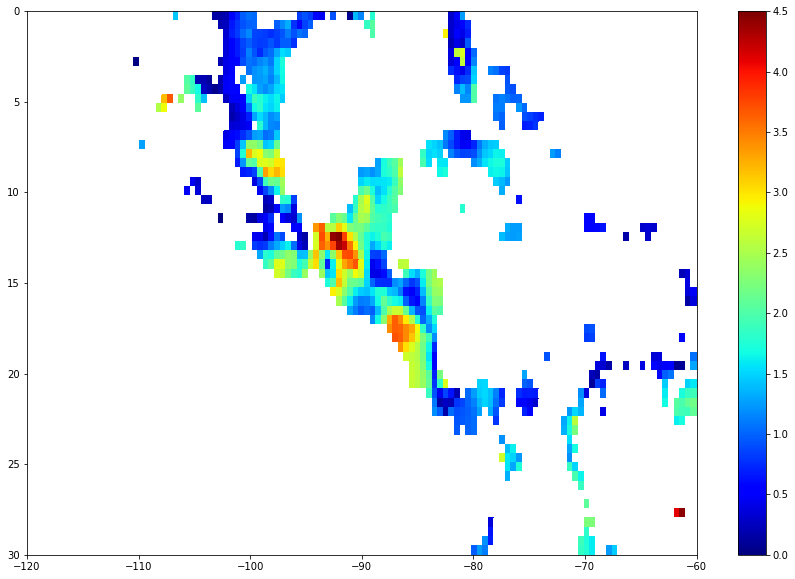

In [11]:
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
fig=plt.figure(figsize=(15,10))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array ( depth, mask=np.isnan(depth)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='jet',vmin=0,vmax=4.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()